#### 6. Develop a program to forecast future values in time series data, such as weather patterns, using RNN models like LSTM or GRU.
(Using daily-minimum-temperature data)

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [4]:
# url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv'

df = pd.read_csv(".\daily-min-temperatures.csv")
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [6]:
data = df['Temp'].values.reshape(-1, 1)
data.shape

(3650, 1)

In [8]:
scaler = MinMaxScaler(feature_range=(0, 1))
data_norm = scaler.fit_transform(data)
data_norm = data_norm.flatten()
data_norm.shape

(3650,)

In [10]:
X, y = [], []
for i in range(len(data_norm) - 10):
    X.append(data_norm[i:i+10])
    y.append(data_norm[i+10])

In [12]:
X, y = np.array(X), np.array(y)
X = X.reshape(X.shape[0], X.shape[1], 1)

In [14]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1], 1)),
    tf.keras.layers.LSTM(50, return_sequences=False),
    tf.keras.layers.Dense(1)
])

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50)                  │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [22]:
history = model.fit(
    X, y,
    epochs=10,
    batch_size=64,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0858 - mae: 0.2292 - val_loss: 0.0109 - val_mae: 0.0813
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0118 - mae: 0.0848 - val_loss: 0.0102 - val_mae: 0.0787
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0113 - mae: 0.0835 - val_loss: 0.0099 - val_mae: 0.0778
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0112 - mae: 0.0826 - val_loss: 0.0098 - val_mae: 0.0774
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0114 - mae: 0.0839 - val_loss: 0.0096 - val_mae: 0.0764
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0111 - mae: 0.0830 - val_loss: 0.0096 - val_mae: 0.0766
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0108 - mae: 0.0816 - val_loss: 0.0094 - val_mae: 0.0755
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0107 - mae: 0.0810 - val_loss: 0.0092 - val_mae: 0.0750
Epoch 9/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.010

In [24]:
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Mean Absolute Error: {test_mae}")

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0090 - mae: 0.0749
Test Loss: 0.009002609178423882
Mean Absolute Error: 0.07393641769886017


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


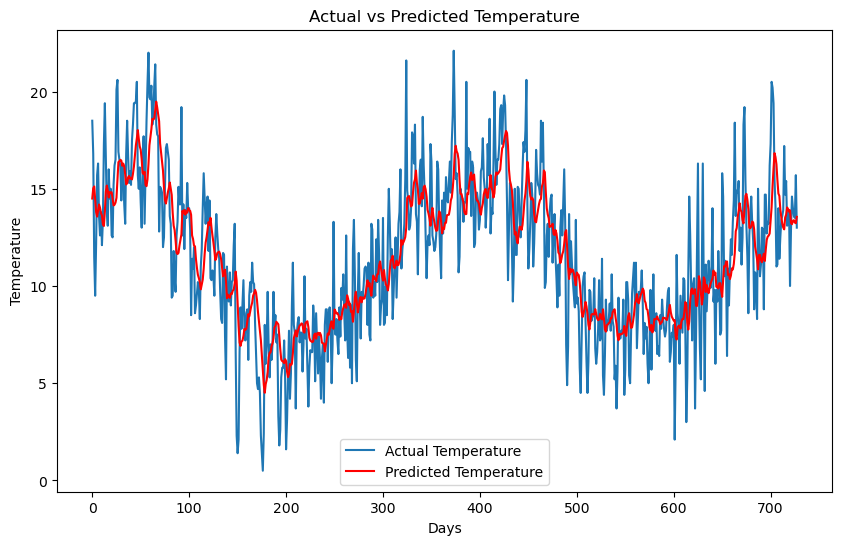

In [26]:
predictions = model.predict(X_test)

predicted_data = scaler.inverse_transform(predictions)
actual_data = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(actual_data, label='Actual Temperature')
plt.plot(predicted_data, label='Predicted Temperature', color='red')
plt.title('Actual vs Predicted Temperature')
plt.xlabel('Days')
plt.ylabel('Temperature')
plt.legend()
plt.show()


**Future Predictions**

In [29]:
preds = []
seq = X[-1]

for _ in range(10):
    pred = model.predict(seq.reshape(1, 10, 1), verbose=0)[0, 0]
    preds.append(pred)
    seq = np.roll(seq, -1) # shift sequence
    seq[-1] = pred # append predicted value

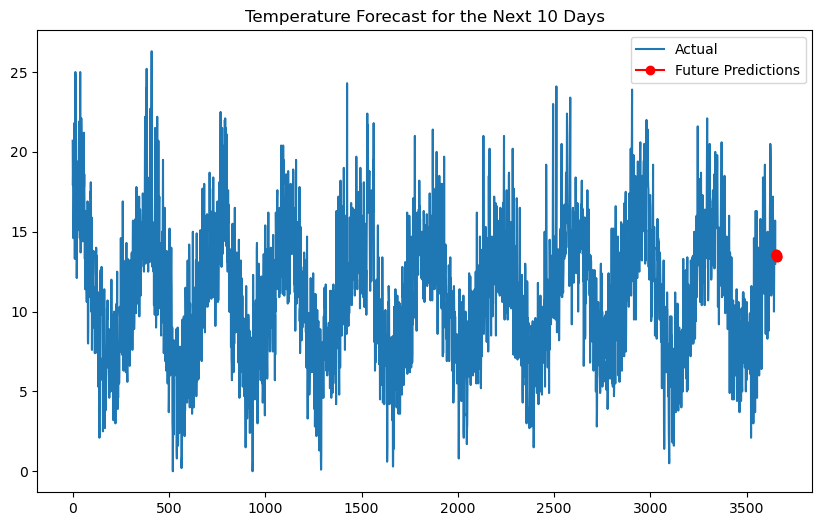

In [31]:
predicted_data = scaler.inverse_transform(np.array(preds).reshape(-1, 1)).flatten()

plt.figure(figsize=(10, 6))
plt.plot(df['Temp'], label='Actual')
plt.plot(range(len(df['Temp']), len(df['Temp']) + 10), predicted_data, 'ro-', label='Future Predictions')
# plt.plot(range(len(df['Temp'])-10, len(df['Temp'])-10+len(predicted_data)), predicted_data, 'ro-', label='Predicted')
plt.legend()
plt.title('Temperature Forecast for the Next 10 Days')
plt.show()